In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black
%load_ext dotenv
%dotenv
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

<IPython.core.display.Javascript object>

In [2]:
import numpy as np

from matplotlib import pyplot as plt
import plotnine as p9
import pandas as pd


%matplotlib inline

<IPython.core.display.Javascript object>

In [60]:
df = (
    pd.read_csv("ocr-output.csv")
    .loc[:, ["frame_num", "landmark", "inference_text", "ssocr"]]
    .query("frame_num > 1000")
)

pp = df.pivot(
    index="frame_num", columns="landmark", values="inference_text"
).reset_index()
ss = df.pivot(index="frame_num", columns="landmark", values="ssocr").reset_index()

<IPython.core.display.Javascript object>

In [59]:
df.frame_num.unique()

array([ 100,  101,  102, ..., 1997, 1998, 1999])

<IPython.core.display.Javascript object>

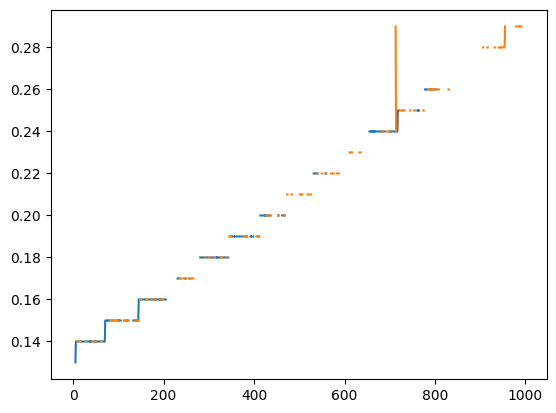

<IPython.core.display.Javascript object>

In [78]:
def process_distance(series):
    return (
        series
        # Replace non-matching strings with ''
        .where(series.str.match("\d\.\d{2}$", na=False), "")
        # Convert the strings to float, invalid parsing will be set as NaN
        .pipe(pd.to_numeric, errors="coerce")
        # Set type
        .astype(float)
    )


def process_calories(series):
    return (
        series
        # Create a copy of the series to preserve the original one
        # .copy()
        # Replace non-digit characters with ''
        .str.replace("[^\d]", "", regex=True)
        # Convert the strings to integers, invalid parsing will be set as NaN
        .pipe(pd.to_numeric, errors="coerce", downcast="integer").astype(float)
        # Convert NaN values to pd.NA to have a nullable integer series
        # .replace(np.nan, pd.NA)
    )


# plt.plot(pp.DISTANCE.pipe(process_distance), ss.DISTANCE.pipe(process_distance))
plt.plot(pp.DISTANCE.pipe(process_distance))
plt.plot(ss.DISTANCE.pipe(process_distance))
# plt.plot(pp, ss)

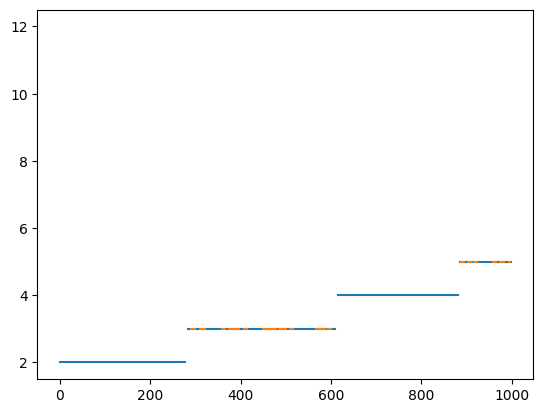

<IPython.core.display.Javascript object>

In [80]:

plt.plot(ss.CALORIES.pipe(process_calories))
plt.plot(pp.CALORIES.pipe(process_calories))



In [32]:
Flow("BuildMonitorDatasetFlow").latest_successful_run.data.ocr_df.query(
    "marker == 'TIME'"
)

,frame,marker,inference_text,inference_score,belowness_score,box_id,is_duplicate
3,output_001.png,TIME,NaN,NaN,384.084172,2,True
9,output_002.png,TIME,NaN,NaN,383.241368,3,True
15,output_003.png,TIME,NaN,NaN,381.764460,2,True
21,output_004.png,TIME,NaN,NaN,383.740532,3,True
27,output_005.png,TIME,NaN,NaN,382.951361,3,True
...,...,...,...,...,...,...,...
693,output_116.png,TIME,NaN,NaN,294.895095,3,True
699,output_117.png,TIME,NaN,NaN,294.895095,3,True
705,output_118.png,TIME,NaN,NaN,293.355600,3,True
711,output_119.png,TIME,NaN,NaN,294.895095,3,True


<IPython.core.display.Javascript object>

In [33]:
df = Flow(
    "BuildMonitorDatasetFlow"
).latest_successful_run.data.phase_1_detection_results

<IPython.core.display.Javascript object>

In [40]:
f45 = df.query("frame.str.contains('045')")
f45.head()

,bbox,inference,inference_text,inference_score,frame
2328,"[[1472.0, 2.0], [1518.0, 2.0], [1518.0, 32.0],...","(INT, 0.6473287343978882)",INT,0.647329,/tmp/tmprudo35r7/frames/output_045.png
2329,"[[1186.0, 28.0], [1304.0, 28.0], [1304.0, 87.0...","(CUSTON, 0.9799797534942627)",CUSTON,0.979980,/tmp/tmprudo35r7/frames/output_045.png
2330,"[[542.0, 40.0], [745.0, 35.0], [746.0, 93.0], ...","(INTERVALS, 0.9972200393676758)",INTERVALS,0.997220,/tmp/tmprudo35r7/frames/output_045.png
2331,"[[1440.0, 34.0], [1552.0, 34.0], [1552.0, 75.0...","(20/10, 0.9998890161514282)",20/10,0.999889,/tmp/tmprudo35r7/frames/output_045.png
2332,"[[320.0, 149.0], [428.0, 149.0], [428.0, 191.0...","(START, 0.9972940683364868)",START,0.997294,/tmp/tmprudo35r7/frames/output_045.png


<IPython.core.display.Javascript object>

[2023/05/20 11:24:54] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/mike/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/mike/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

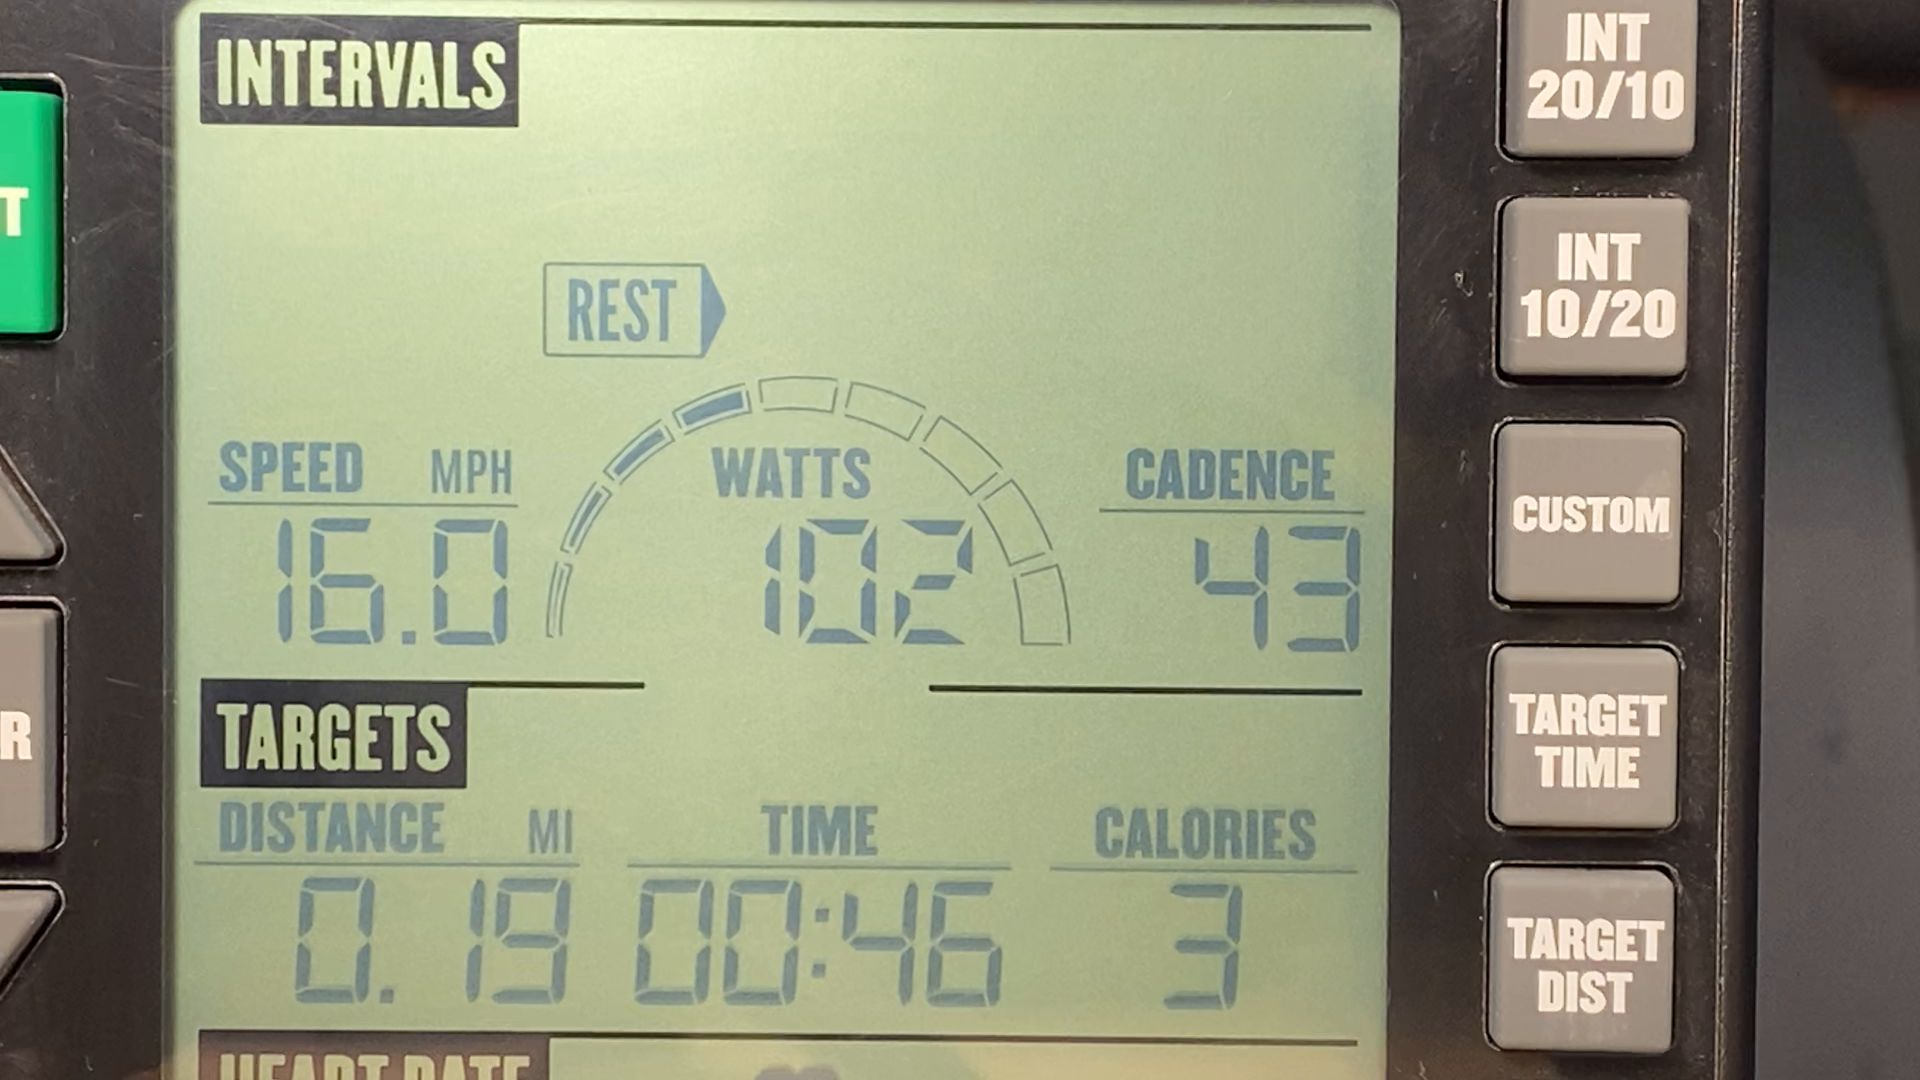

<IPython.core.display.Javascript object>

In [520]:
ocr = PaddleOCR(
    use_angle_cls=True, lang="en"
)  # need to run only once to download and load model into memory
from fuzzywuzzy import fuzz, process

from PIL import Image
from paddleocr import PaddleOCR

im = Image.open("/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1404.png")
im

In [302]:
def paddle_results_to_df(result):
    df = pd.DataFrame(result, columns=["bbox", "inference"])
    df[["inference_text", "inference_score"]] = pd.DataFrame(
        df["inference"].tolist(), index=df.index
    )

    df.drop(columns="inference")
    return df


def crop_image(image, bbox):
    """
    Crop an image (in numpy representation) to the given bounding box.

    Args:
    - image (numpy.ndarray): The input image in numpy format (height, width, channels)
    - bbox (list or tuple): The bounding box as (x_min, y_min, x_max, y_max)

    Returns:
    - cropped_image (numpy.ndarray): The cropped image
    """
    x_min, y_min, x_max, y_max = bbox
    cropped_image = image[y_min:y_max, x_min:x_max]

    return cropped_image


def make_polygons_2d(polygons):
    return np.concatenate(polygons).reshape(-1, 2).astype(np.float32)


def super_bounding_box(xy):
    xx, yy = xy[:, 0], xy[:, 1]

    return [xx.min(), xx.max(), yy.min(), yy.max()]


def best_match_2(text, markers):
    # calculate the best match out of the possible markers
    best = process.extractOne(text, markers, score_cutoff=90)
    if best is None:
        return ""
    return best[0]


def compute_distance(bbox1, bbox2):
    center1 = bbox1.mean(axis=0)
    try:
        # Compute centers of mass
        center1 = bbox1.mean(axis=0)
        center2 = bbox2.mean(axis=0)

        # Compute Euclidean distance between centers
        distance = np.linalg.norm(center1 - center2)
    except:
        return 1000

    return distance


def compute_angle(bbox1, bbox2):
    try:
        # Compute centers of mass
        center1 = bbox1.mean(axis=0)
        center2 = bbox2.mean(axis=0)

        # Compute angle relative to bbox1
        diff = center2 - center1
        angle = math.atan2(diff[1], diff[0]) * 180 / math.pi
    except:
        return 180

    return angle


def process_group_2(group):
    landmarks = group.assign(
        inference_clean=group["inference_text"].apply(best_match_2)
    )

    uniques = ["SPEED", "WATTS", "CADENCE", "CALORIES"]
    surround_box = super_bounding_box(
        make_polygons_2d(
            landmarks.query("inference_clean.isin(@uniques)").bbox.to_numpy()
        )
    )
    xl, xr, yt, yb = surround_box
    w = abs(xl - xr)
    h = abs(yt - yb)
    print(w, h)
    # surround_box = [xl, yt, round(xr + 1.05 * w), round(yb - h)]
    return (round(xl - 0.02 * w), yt, round(xr + 0.075 * w), round(yb + 0.42 * h))

<IPython.core.display.Javascript object>

In [471]:
def plausible_number(w, thresh=0.5):
    return (sum(1 for c in w if c.isdigit() or c in ":.") / len(w)) > thresh


def locate_numbers(
    df,
    landmarks=(
        "SPEED",
        "WATTS",
        "CADENCE",
        "CALORIES",
        "DISTANCE",
        "TIME",
    ),
    min_score=0.9,
):
    candidates_df = (
        df.query("inference_score >= @min_score")
        .loc[lambda f: f.inference_text.apply(plausible_number)]
        .reset_index(drop=True)
        .assign(box_id=lambda f: range(len(f)))
    )

    out = []
    for landmark in landmarks:
        rec = df.query("inference_text == @landmark")
        if landmark == "TIME":
            # TIME matches two places typically, we want the one more to the left.
            rec = (
                rec.assign(
                    bbox_left=lambda f: [e[:, 0].min() for e in f.bbox]
                ).sort_values("bbox_left")
            ).head(1)
        assert len(rec) == 1
        rec = rec.squeeze()

        _df = (
            candidates_df.assign(
                distance_from_ref=lambda f: [
                    compute_distance(rec.bbox, e) for e in f.bbox
                ],
                angle_from_ref=lambda f: [compute_angle(rec.bbox, e) for e in f.bbox],
            )
            .assign(
                belowness_score=lambda f: f.distance_from_ref
                + abs(f.angle_from_ref - 90)
            )
            .sort_values("belowness_score")
        )

        out.append(_df.head(1).assign(landmark=landmark, landmark_bbox=[rec.bbox]))

    return (
        pd.concat(out)
        .sort_values(["box_id", "belowness_score"])
        .assign(
            inference_text=lambda f: f.inference_text.where(
                ~f.duplicated(subset="box_id"), None
            ),
            inference_score=lambda f: f.inference_score.where(
                f.inference_text.notnull(), None
            ),
            bbox=lambda f: f.bbox.where(f.inference_text.notnull(), None),
        )
        .loc[
            :,
            [
                "landmark",
                "inference_text",
                "inference_score",
                # "distance_from_ref",
                # "angle_from_ref",
                # "belowness_score",
                # "box_id",
                "landmark_bbox",
                "bbox",
            ],
        ]
        .rename(columns={"bbox": "match_bbox"})
        .sort_values("landmark")
        .reset_index(drop=True)
    )


# ff = paddle_results_to_df(ocr.ocr(np.asarray(im), cls=True)[0])
# ff


bb = locate_numbers(ff.assign(bbox=lambda f: f.bbox.apply(make_polygons_2d)))
bb


# imc = im.crop(bb)

# resize_width = 1000
# resize_height = int(
#     imc.height * (resize_width / imc.width)
# )
# imd = imc.resize(
#     (resize_width, resize_height), Image.LANCZOS
# )
# imd

# paddle_results_to_df(ocr.ocr(np.asarray(imd), cls=True)[0])

,landmark,inference_text,inference_score,landmark_bbox,match_bbox
0,CADENCE,None,NaN,"[[1122.0, 443.0], [1340.0, 443.0], [1340.0, 50...",None
1,CALORIES,3,0.956618,"[[1093.0, 800.0], [1320.0, 804.0], [1319.0, 86...","[[1158.0, 891.0], [1240.0, 891.0], [1240.0, 10..."
2,DISTANCE,None,NaN,"[[213.0, 794.0], [450.0, 798.0], [449.0, 854.0...",None
3,SPEED,16.0,0.996945,"[[216.0, 437.0], [370.0, 437.0], [370.0, 494.0...","[[258.0, 503.0], [531.0, 509.0], [528.0, 654.0..."
4,TIME,00:46,0.957265,"[[758.0, 798.0], [882.0, 798.0], [882.0, 858.0...","[[616.0, 881.0], [1008.0, 881.0], [1008.0, 100..."
5,WATTS,102,0.997975,"[[708.0, 441.0], [878.0, 441.0], [878.0, 504.0...","[[752.0, 504.0], [996.0, 504.0], [996.0, 653.0..."


<IPython.core.display.Javascript object>

In [529]:
config = {
    "SPEED": dict(
        sel=(-0.2, 1.25, 1.03, 2.7),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "WATTS": dict(
        sel=(-0.2, 1.1, 0.6, 2.5),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "CADENCE": dict(
        sel=(0, 1.25, 0.20, 2.9),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "DISTANCE": dict(
        sel=(0, 1.3, 0.75, 3.25),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "TIME": dict(
        sel=(-1.2, 1.2, 1.45, 2.75),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "CALORIES": dict(
        sel=(0, 1.2, 0.2, 2.5),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
}


sample = (
    pd.Series(glob.glob("/bucket/exercise-machina/tmpqdhq4d5e/frames/*.png"))
    .sample(5, random_state=2009, replace=False)
    .sort_values()
    .tolist()
)
sample = sorted(glob.glob("/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1*.png"))

match_frames = []
for e in sample:
    im = Image.open(e)
    ocr_df = paddle_results_to_df(ocr.ocr(np.asarray(im), cls=True)[0]).assign(
        bbox=lambda f: f.bbox.apply(make_polygons_2d)
    )
    order = int("".join([c for c in os.path.basename(e) if c.isdigit()]))
    match_frame = locate_numbers(ocr_df).assign(frame=e, frame_num=order)

    ssocr_inf = []
    for rec in match_frame.itertuples():
        cfg = config[rec.landmark]
        imc, out = ssocr_subimage(im.convert("L"), rec.landmark_bbox, cfg["sel"], cfg["ssocr_conf"])
        ssocr_inf.append(out)
    match_frame = match_frame.assign(ssocr=ssocr_inf)

    match_frames.append(match_frame)

matches = pd.concat(match_frames).sort_values(["frame_num", "landmark"])
matches.to_csv("ocr-output.csv")

[2023/05/20 12:36:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26262855529785156
[2023/05/20 12:36:47] ppocr DEBUG: cls num  : 28, elapse : 0.10440707206726074
[2023/05/20 12:36:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.523725986480713
[2023/05/20 12:36:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2625420093536377
[2023/05/20 12:36:49] ppocr DEBUG: cls num  : 29, elapse : 0.10705447196960449
[2023/05/20 12:36:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5640075206756592
[2023/05/20 12:36:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2589747905731201
[2023/05/20 12:36:51] ppocr DEBUG: cls num  : 29, elapse : 0.10888862609863281
[2023/05/20 12:36:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596652030944824
[2023/05/20 12:36:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2616007328033447
[2023/05/20 12:36:53] ppocr DEBUG: cls num  : 29, elapse : 0.10769510269165039
[2023/05/20 12:36:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.564136028289795
[2023/05/20 12:36:55] ppocr D

[2023/05/20 12:37:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26157140731811523
[2023/05/20 12:37:55] ppocr DEBUG: cls num  : 27, elapse : 0.10170364379882812
[2023/05/20 12:37:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4587054252624512
[2023/05/20 12:37:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25826358795166016
[2023/05/20 12:37:57] ppocr DEBUG: cls num  : 28, elapse : 0.10389018058776855
[2023/05/20 12:37:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.509032964706421
[2023/05/20 12:37:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26336169242858887
[2023/05/20 12:37:59] ppocr DEBUG: cls num  : 28, elapse : 0.1028604507446289
[2023/05/20 12:38:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.505202054977417
[2023/05/20 12:38:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.27420711517333984
[2023/05/20 12:38:01] ppocr DEBUG: cls num  : 27, elapse : 0.12529516220092773
[2023/05/20 12:38:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4599363803863525
[2023/05/20 12:38:03] ppocr

[2023/05/20 12:39:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26229429244995117
[2023/05/20 12:39:02] ppocr DEBUG: cls num  : 29, elapse : 0.10681867599487305
[2023/05/20 12:39:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596718788146973
[2023/05/20 12:39:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25751519203186035
[2023/05/20 12:39:04] ppocr DEBUG: cls num  : 29, elapse : 0.10741257667541504
[2023/05/20 12:39:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.556837558746338
[2023/05/20 12:39:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2653679847717285
[2023/05/20 12:39:06] ppocr DEBUG: cls num  : 29, elapse : 0.10777759552001953
[2023/05/20 12:39:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583703517913818
[2023/05/20 12:39:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2632315158843994
[2023/05/20 12:39:08] ppocr DEBUG: cls num  : 29, elapse : 0.10704898834228516
[2023/05/20 12:39:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5775032043457031
[2023/05/20 12:39:10] ppocr

[2023/05/20 12:40:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26325106620788574
[2023/05/20 12:40:10] ppocr DEBUG: cls num  : 29, elapse : 0.10692930221557617
[2023/05/20 12:40:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581660270690918
[2023/05/20 12:40:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2608022689819336
[2023/05/20 12:40:12] ppocr DEBUG: cls num  : 29, elapse : 0.10751175880432129
[2023/05/20 12:40:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5767388343811035
[2023/05/20 12:40:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.257098913192749
[2023/05/20 12:40:15] ppocr DEBUG: cls num  : 29, elapse : 0.10715603828430176
[2023/05/20 12:40:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630900859832764
[2023/05/20 12:40:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2630348205566406
[2023/05/20 12:40:17] ppocr DEBUG: cls num  : 27, elapse : 0.09984636306762695
[2023/05/20 12:40:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4628932476043701
[2023/05/20 12:40:18] ppocr 

[2023/05/20 12:41:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566037178039551
[2023/05/20 12:41:19] ppocr DEBUG: cls num  : 28, elapse : 0.10525846481323242
[2023/05/20 12:41:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051765441894531
[2023/05/20 12:41:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594625949859619
[2023/05/20 12:41:21] ppocr DEBUG: cls num  : 28, elapse : 0.10353970527648926
[2023/05/20 12:41:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049941539764404
[2023/05/20 12:41:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2639319896697998
[2023/05/20 12:41:23] ppocr DEBUG: cls num  : 28, elapse : 0.10409832000732422
[2023/05/20 12:41:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035240650177002
[2023/05/20 12:41:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26266980171203613
[2023/05/20 12:41:25] ppocr DEBUG: cls num  : 27, elapse : 0.10006356239318848
[2023/05/20 12:41:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4478347301483154
[2023/05/20 12:41:27] ppocr

[2023/05/20 12:42:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625603675842285
[2023/05/20 12:42:25] ppocr DEBUG: cls num  : 28, elapse : 0.10294175148010254
[2023/05/20 12:42:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5259754657745361
[2023/05/20 12:42:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26009321212768555
[2023/05/20 12:42:27] ppocr DEBUG: cls num  : 27, elapse : 0.10123920440673828
[2023/05/20 12:42:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4580717086791992
[2023/05/20 12:42:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25516390800476074
[2023/05/20 12:42:29] ppocr DEBUG: cls num  : 29, elapse : 0.10763669013977051
[2023/05/20 12:42:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603547096252441
[2023/05/20 12:42:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26061534881591797
[2023/05/20 12:42:31] ppocr DEBUG: cls num  : 28, elapse : 0.10296010971069336
[2023/05/20 12:42:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056140422821045
[2023/05/20 12:42:33] ppo

[2023/05/20 12:43:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2594921588897705
[2023/05/20 12:43:33] ppocr DEBUG: cls num  : 29, elapse : 0.10756444931030273
[2023/05/20 12:43:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.561290979385376
[2023/05/20 12:43:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2630650997161865
[2023/05/20 12:43:35] ppocr DEBUG: cls num  : 29, elapse : 0.10682511329650879
[2023/05/20 12:43:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5626118183135986
[2023/05/20 12:43:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2661612033843994
[2023/05/20 12:43:37] ppocr DEBUG: cls num  : 27, elapse : 0.09991598129272461
[2023/05/20 12:43:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4574251174926758
[2023/05/20 12:43:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2616894245147705
[2023/05/20 12:43:39] ppocr DEBUG: cls num  : 28, elapse : 0.10455679893493652
[2023/05/20 12:43:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068011283874512
[2023/05/20 12:43:41] ppocr D

[2023/05/20 12:44:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619917392730713
[2023/05/20 12:44:41] ppocr DEBUG: cls num  : 27, elapse : 0.09993124008178711
[2023/05/20 12:44:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549665451049805
[2023/05/20 12:44:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25556373596191406
[2023/05/20 12:44:43] ppocr DEBUG: cls num  : 28, elapse : 0.10440850257873535
[2023/05/20 12:44:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024957656860352
[2023/05/20 12:44:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26299285888671875
[2023/05/20 12:44:45] ppocr DEBUG: cls num  : 28, elapse : 0.10384821891784668
[2023/05/20 12:44:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5014758110046387
[2023/05/20 12:44:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.262725830078125
[2023/05/20 12:44:47] ppocr DEBUG: cls num  : 29, elapse : 0.1071164608001709
[2023/05/20 12:44:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.564594030380249
[2023/05/20 12:44:49] ppocr D

[2023/05/20 12:45:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25695347785949707
[2023/05/20 12:45:48] ppocr DEBUG: cls num  : 28, elapse : 0.10503911972045898
[2023/05/20 12:45:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.515648603439331
[2023/05/20 12:45:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26294994354248047
[2023/05/20 12:45:50] ppocr DEBUG: cls num  : 28, elapse : 0.1037144660949707
[2023/05/20 12:45:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.503937005996704
[2023/05/20 12:45:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2634587287902832
[2023/05/20 12:45:52] ppocr DEBUG: cls num  : 28, elapse : 0.10497140884399414
[2023/05/20 12:45:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.507810354232788
[2023/05/20 12:45:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563915252685547
[2023/05/20 12:45:54] ppocr DEBUG: cls num  : 27, elapse : 0.09991025924682617
[2023/05/20 12:45:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4578099250793457
[2023/05/20 12:45:55] ppocr DE

[2023/05/20 12:46:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26207470893859863
[2023/05/20 12:46:54] ppocr DEBUG: cls num  : 28, elapse : 0.10332751274108887
[2023/05/20 12:46:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037424564361572
[2023/05/20 12:46:56] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2644925117492676
[2023/05/20 12:46:56] ppocr DEBUG: cls num  : 30, elapse : 0.1105797290802002
[2023/05/20 12:46:58] ppocr DEBUG: rec_res num  : 30, elapse : 1.607959508895874
[2023/05/20 12:46:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2656128406524658
[2023/05/20 12:46:58] ppocr DEBUG: cls num  : 28, elapse : 0.10433840751647949
[2023/05/20 12:47:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020155906677246
[2023/05/20 12:47:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26178908348083496
[2023/05/20 12:47:00] ppocr DEBUG: cls num  : 29, elapse : 0.10687613487243652
[2023/05/20 12:47:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.560697317123413
[2023/05/20 12:47:02] ppocr D

[2023/05/20 12:48:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26148176193237305
[2023/05/20 12:48:02] ppocr DEBUG: cls num  : 27, elapse : 0.1001436710357666
[2023/05/20 12:48:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4581775665283203
[2023/05/20 12:48:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2631359100341797
[2023/05/20 12:48:04] ppocr DEBUG: cls num  : 29, elapse : 0.10758376121520996
[2023/05/20 12:48:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581026077270508
[2023/05/20 12:48:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26001405715942383
[2023/05/20 12:48:06] ppocr DEBUG: cls num  : 27, elapse : 0.10201382637023926
[2023/05/20 12:48:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515423774719238
[2023/05/20 12:48:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2631053924560547
[2023/05/20 12:48:08] ppocr DEBUG: cls num  : 28, elapse : 0.10443925857543945
[2023/05/20 12:48:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055091381072998
[2023/05/20 12:48:10] ppocr

[2023/05/20 12:49:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2594878673553467
[2023/05/20 12:49:09] ppocr DEBUG: cls num  : 27, elapse : 0.09986066818237305
[2023/05/20 12:49:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481089115142822
[2023/05/20 12:49:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2583491802215576
[2023/05/20 12:49:10] ppocr DEBUG: cls num  : 28, elapse : 0.10351967811584473
[2023/05/20 12:49:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.519810438156128
[2023/05/20 12:49:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260317325592041
[2023/05/20 12:49:12] ppocr DEBUG: cls num  : 27, elapse : 0.09972262382507324
[2023/05/20 12:49:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4492778778076172
[2023/05/20 12:49:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2639634609222412
[2023/05/20 12:49:14] ppocr DEBUG: cls num  : 28, elapse : 0.10422229766845703
[2023/05/20 12:49:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.502676248550415
[2023/05/20 12:49:16] ppocr DEB

[2023/05/20 12:50:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593979835510254
[2023/05/20 12:50:15] ppocr DEBUG: cls num  : 28, elapse : 0.1038045883178711
[2023/05/20 12:50:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5145013332366943
[2023/05/20 12:50:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.258800745010376
[2023/05/20 12:50:17] ppocr DEBUG: cls num  : 28, elapse : 0.10427093505859375
[2023/05/20 12:50:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5106821060180664
[2023/05/20 12:50:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25563502311706543
[2023/05/20 12:50:19] ppocr DEBUG: cls num  : 27, elapse : 0.10074901580810547
[2023/05/20 12:50:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4542882442474365
[2023/05/20 12:50:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25815367698669434
[2023/05/20 12:50:21] ppocr DEBUG: cls num  : 28, elapse : 0.1038508415222168
[2023/05/20 12:50:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054404735565186
[2023/05/20 12:50:23] ppocr D

[2023/05/20 12:51:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565147876739502
[2023/05/20 12:51:22] ppocr DEBUG: cls num  : 28, elapse : 0.10489201545715332
[2023/05/20 12:51:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5022752285003662
[2023/05/20 12:51:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2645261287689209
[2023/05/20 12:51:24] ppocr DEBUG: cls num  : 27, elapse : 0.10039615631103516
[2023/05/20 12:51:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498145580291748
[2023/05/20 12:51:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26074814796447754
[2023/05/20 12:51:26] ppocr DEBUG: cls num  : 27, elapse : 0.10038638114929199
[2023/05/20 12:51:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517278671264648
[2023/05/20 12:51:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25757503509521484
[2023/05/20 12:51:28] ppocr DEBUG: cls num  : 28, elapse : 0.10339760780334473
[2023/05/20 12:51:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062305927276611
[2023/05/20 12:51:30] ppoc

[2023/05/20 12:52:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25966477394104004
[2023/05/20 12:52:27] ppocr DEBUG: cls num  : 27, elapse : 0.1008613109588623
[2023/05/20 12:52:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496862888336182
[2023/05/20 12:52:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569468021392822
[2023/05/20 12:52:29] ppocr DEBUG: cls num  : 28, elapse : 0.10351705551147461
[2023/05/20 12:52:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.503051519393921
[2023/05/20 12:52:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2618734836578369
[2023/05/20 12:52:31] ppocr DEBUG: cls num  : 27, elapse : 0.10016322135925293
[2023/05/20 12:52:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491205215454102
[2023/05/20 12:52:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25952672958374023
[2023/05/20 12:52:33] ppocr DEBUG: cls num  : 28, elapse : 0.10421109199523926
[2023/05/20 12:52:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046310424804688
[2023/05/20 12:52:35] ppocr 

[2023/05/20 12:53:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26453089714050293
[2023/05/20 12:53:34] ppocr DEBUG: cls num  : 28, elapse : 0.10383462905883789
[2023/05/20 12:53:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.499574899673462
[2023/05/20 12:53:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26088857650756836
[2023/05/20 12:53:36] ppocr DEBUG: cls num  : 28, elapse : 0.10350728034973145
[2023/05/20 12:53:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060372352600098
[2023/05/20 12:53:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2617614269256592
[2023/05/20 12:53:38] ppocr DEBUG: cls num  : 29, elapse : 0.10741376876831055
[2023/05/20 12:53:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565388202667236
[2023/05/20 12:53:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26328206062316895
[2023/05/20 12:53:40] ppocr DEBUG: cls num  : 29, elapse : 0.1064751148223877
[2023/05/20 12:53:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.557912826538086
[2023/05/20 12:53:41] ppocr 

[2023/05/20 12:54:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2615659236907959
[2023/05/20 12:54:40] ppocr DEBUG: cls num  : 27, elapse : 0.10028409957885742
[2023/05/20 12:54:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503405094146729
[2023/05/20 12:54:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25958776473999023
[2023/05/20 12:54:42] ppocr DEBUG: cls num  : 27, elapse : 0.09982895851135254
[2023/05/20 12:54:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485385417938232
[2023/05/20 12:54:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558300495147705
[2023/05/20 12:54:44] ppocr DEBUG: cls num  : 27, elapse : 0.10045194625854492
[2023/05/20 12:54:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.448425531387329
[2023/05/20 12:54:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2626042366027832
[2023/05/20 12:54:45] ppocr DEBUG: cls num  : 27, elapse : 0.10034847259521484
[2023/05/20 12:54:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.450214147567749
[2023/05/20 12:54:47] ppocr D

[2023/05/20 12:55:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567760944366455
[2023/05/20 12:55:44] ppocr DEBUG: cls num  : 27, elapse : 0.10026168823242188
[2023/05/20 12:55:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554927349090576
[2023/05/20 12:55:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26050400733947754
[2023/05/20 12:55:46] ppocr DEBUG: cls num  : 26, elapse : 0.09648704528808594
[2023/05/20 12:55:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961143493652344
[2023/05/20 12:55:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569401264190674
[2023/05/20 12:55:48] ppocr DEBUG: cls num  : 27, elapse : 0.09964466094970703
[2023/05/20 12:55:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4571967124938965
[2023/05/20 12:55:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25715065002441406
[2023/05/20 12:55:49] ppocr DEBUG: cls num  : 28, elapse : 0.10383367538452148
[2023/05/20 12:55:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064582824707031
[2023/05/20 12:55:51] ppoc

[2023/05/20 12:56:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614562511444092
[2023/05/20 12:56:49] ppocr DEBUG: cls num  : 27, elapse : 0.1016383171081543
[2023/05/20 12:56:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4659738540649414
[2023/05/20 12:56:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26161956787109375
[2023/05/20 12:56:51] ppocr DEBUG: cls num  : 27, elapse : 0.10105204582214355
[2023/05/20 12:56:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481732845306396
[2023/05/20 12:56:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573707103729248
[2023/05/20 12:56:53] ppocr DEBUG: cls num  : 27, elapse : 0.09926533699035645
[2023/05/20 12:56:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4472970962524414
[2023/05/20 12:56:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26111364364624023
[2023/05/20 12:56:55] ppocr DEBUG: cls num  : 27, elapse : 0.10019779205322266
[2023/05/20 12:56:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.446770191192627
[2023/05/20 12:56:57] ppocr 

[2023/05/20 12:57:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2618575096130371
[2023/05/20 12:57:55] ppocr DEBUG: cls num  : 27, elapse : 0.10140299797058105
[2023/05/20 12:57:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520576000213623
[2023/05/20 12:57:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26315736770629883
[2023/05/20 12:57:57] ppocr DEBUG: cls num  : 28, elapse : 0.10391497611999512
[2023/05/20 12:57:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080492496490479
[2023/05/20 12:57:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594003677368164
[2023/05/20 12:57:59] ppocr DEBUG: cls num  : 28, elapse : 0.10313892364501953
[2023/05/20 12:58:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025877952575684
[2023/05/20 12:58:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2624819278717041
[2023/05/20 12:58:01] ppocr DEBUG: cls num  : 28, elapse : 0.1044003963470459
[2023/05/20 12:58:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071277618408203
[2023/05/20 12:58:02] ppocr 

[2023/05/20 12:59:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568643093109131
[2023/05/20 12:59:01] ppocr DEBUG: cls num  : 27, elapse : 0.10225725173950195
[2023/05/20 12:59:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524950981140137
[2023/05/20 12:59:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2588343620300293
[2023/05/20 12:59:02] ppocr DEBUG: cls num  : 29, elapse : 0.10683488845825195
[2023/05/20 12:59:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5643527507781982
[2023/05/20 12:59:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25662851333618164
[2023/05/20 12:59:05] ppocr DEBUG: cls num  : 27, elapse : 0.10155105590820312
[2023/05/20 12:59:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519999027252197
[2023/05/20 12:59:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26164817810058594
[2023/05/20 12:59:06] ppocr DEBUG: cls num  : 29, elapse : 0.10804200172424316
[2023/05/20 12:59:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621612071990967
[2023/05/20 12:59:08] ppoc

[2023/05/20 13:00:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2609391212463379
[2023/05/20 13:00:07] ppocr DEBUG: cls num  : 29, elapse : 0.10821986198425293
[2023/05/20 13:00:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589308738708496
[2023/05/20 13:00:08] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25870370864868164
[2023/05/20 13:00:09] ppocr DEBUG: cls num  : 25, elapse : 0.09309267997741699
[2023/05/20 13:00:10] ppocr DEBUG: rec_res num  : 25, elapse : 1.3425929546356201
[2023/05/20 13:00:10] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26197290420532227
[2023/05/20 13:00:10] ppocr DEBUG: cls num  : 25, elapse : 0.0926063060760498
[2023/05/20 13:00:12] ppocr DEBUG: rec_res num  : 25, elapse : 1.3462343215942383
[2023/05/20 13:00:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25735974311828613
[2023/05/20 13:00:12] ppocr DEBUG: cls num  : 28, elapse : 0.10348701477050781
[2023/05/20 13:00:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045924186706543
[2023/05/20 13:00:14] ppoc

[2023/05/20 13:01:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26322221755981445
[2023/05/20 13:01:13] ppocr DEBUG: cls num  : 28, elapse : 0.10542631149291992
[2023/05/20 13:01:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045218467712402
[2023/05/20 13:01:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26020193099975586
[2023/05/20 13:01:15] ppocr DEBUG: cls num  : 26, elapse : 0.09661126136779785
[2023/05/20 13:01:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955473899841309
[2023/05/20 13:01:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26035165786743164
[2023/05/20 13:01:17] ppocr DEBUG: cls num  : 27, elapse : 0.10034394264221191
[2023/05/20 13:01:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521191120147705
[2023/05/20 13:01:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2621276378631592
[2023/05/20 13:01:19] ppocr DEBUG: cls num  : 27, elapse : 0.10021710395812988
[2023/05/20 13:01:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490087032318115
[2023/05/20 13:01:21] ppo

[2023/05/20 13:02:19] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26250481605529785
[2023/05/20 13:02:20] ppocr DEBUG: cls num  : 30, elapse : 0.11098670959472656
[2023/05/20 13:02:21] ppocr DEBUG: rec_res num  : 30, elapse : 1.6137628555297852
[2023/05/20 13:02:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573678493499756
[2023/05/20 13:02:22] ppocr DEBUG: cls num  : 28, elapse : 0.10360860824584961
[2023/05/20 13:02:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5087788105010986
[2023/05/20 13:02:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2600882053375244
[2023/05/20 13:02:24] ppocr DEBUG: cls num  : 28, elapse : 0.10485243797302246
[2023/05/20 13:02:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023727416992188
[2023/05/20 13:02:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2589106559753418
[2023/05/20 13:02:26] ppocr DEBUG: cls num  : 27, elapse : 0.0997304916381836
[2023/05/20 13:02:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516377449035645
[2023/05/20 13:02:27] ppocr 

[2023/05/20 13:03:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2608635425567627
[2023/05/20 13:03:27] ppocr DEBUG: cls num  : 29, elapse : 0.1067349910736084
[2023/05/20 13:03:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.560877799987793
[2023/05/20 13:03:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2628507614135742
[2023/05/20 13:03:29] ppocr DEBUG: cls num  : 29, elapse : 0.10687661170959473
[2023/05/20 13:03:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5617189407348633
[2023/05/20 13:03:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26183629035949707
[2023/05/20 13:03:31] ppocr DEBUG: cls num  : 26, elapse : 0.09624123573303223
[2023/05/20 13:03:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.3979158401489258
[2023/05/20 13:03:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2591240406036377
[2023/05/20 13:03:33] ppocr DEBUG: cls num  : 29, elapse : 0.10828614234924316
[2023/05/20 13:03:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599391460418701
[2023/05/20 13:03:35] ppocr D

[2023/05/20 13:04:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2612299919128418
[2023/05/20 13:04:34] ppocr DEBUG: cls num  : 29, elapse : 0.10802102088928223
[2023/05/20 13:04:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5573091506958008
[2023/05/20 13:04:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2612433433532715
[2023/05/20 13:04:36] ppocr DEBUG: cls num  : 29, elapse : 0.10736370086669922
[2023/05/20 13:04:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589320659637451
[2023/05/20 13:04:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25755834579467773
[2023/05/20 13:04:38] ppocr DEBUG: cls num  : 29, elapse : 0.10657644271850586
[2023/05/20 13:04:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608644485473633
[2023/05/20 13:04:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26133036613464355
[2023/05/20 13:04:40] ppocr DEBUG: cls num  : 26, elapse : 0.09672284126281738
[2023/05/20 13:04:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.3950493335723877
[2023/05/20 13:04:42] ppoc

[2023/05/20 13:05:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2622091770172119
[2023/05/20 13:05:41] ppocr DEBUG: cls num  : 29, elapse : 0.1067953109741211
[2023/05/20 13:05:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588841438293457
[2023/05/20 13:05:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25985264778137207
[2023/05/20 13:05:43] ppocr DEBUG: cls num  : 28, elapse : 0.10449409484863281
[2023/05/20 13:05:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016887187957764
[2023/05/20 13:05:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2632629871368408
[2023/05/20 13:05:45] ppocr DEBUG: cls num  : 27, elapse : 0.10010981559753418
[2023/05/20 13:05:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.447572946548462
[2023/05/20 13:05:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557849884033203
[2023/05/20 13:05:47] ppocr DEBUG: cls num  : 28, elapse : 0.10296893119812012
[2023/05/20 13:05:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063974857330322
[2023/05/20 13:05:49] ppocr D

[2023/05/20 13:06:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26351022720336914
[2023/05/20 13:06:47] ppocr DEBUG: cls num  : 28, elapse : 0.10450172424316406
[2023/05/20 13:06:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.518894910812378
[2023/05/20 13:06:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25984954833984375
[2023/05/20 13:06:49] ppocr DEBUG: cls num  : 27, elapse : 0.10025691986083984
[2023/05/20 13:06:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545681476593018
[2023/05/20 13:06:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2615959644317627
[2023/05/20 13:06:51] ppocr DEBUG: cls num  : 27, elapse : 0.10154032707214355
[2023/05/20 13:06:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533400535583496
[2023/05/20 13:06:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2647836208343506
[2023/05/20 13:06:52] ppocr DEBUG: cls num  : 28, elapse : 0.10368108749389648
[2023/05/20 13:06:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040833950042725
[2023/05/20 13:06:54] ppocr

[2023/05/20 13:07:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26234912872314453
[2023/05/20 13:07:52] ppocr DEBUG: cls num  : 27, elapse : 0.09955263137817383
[2023/05/20 13:07:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.448011875152588
[2023/05/20 13:07:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601053714752197
[2023/05/20 13:07:54] ppocr DEBUG: cls num  : 26, elapse : 0.09731316566467285
[2023/05/20 13:07:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964085578918457
[2023/05/20 13:07:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595200538635254
[2023/05/20 13:07:56] ppocr DEBUG: cls num  : 27, elapse : 0.10060858726501465
[2023/05/20 13:07:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4476666450500488
[2023/05/20 13:07:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25832247734069824
[2023/05/20 13:07:58] ppocr DEBUG: cls num  : 28, elapse : 0.10299468040466309
[2023/05/20 13:07:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101189613342285
[2023/05/20 13:08:00] ppocr

[2023/05/20 13:08:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2606072425842285
[2023/05/20 13:08:58] ppocr DEBUG: cls num  : 28, elapse : 0.1037294864654541
[2023/05/20 13:08:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052530765533447
[2023/05/20 13:08:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2600092887878418
[2023/05/20 13:09:00] ppocr DEBUG: cls num  : 27, elapse : 0.09941840171813965
[2023/05/20 13:09:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479310512542725
[2023/05/20 13:09:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2624173164367676
[2023/05/20 13:09:01] ppocr DEBUG: cls num  : 27, elapse : 0.09961533546447754
[2023/05/20 13:09:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534614086151123
[2023/05/20 13:09:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2617373466491699
[2023/05/20 13:09:03] ppocr DEBUG: cls num  : 27, elapse : 0.10001921653747559
[2023/05/20 13:09:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510600566864014
[2023/05/20 13:09:05] ppocr D

[2023/05/20 13:10:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26580071449279785
[2023/05/20 13:10:03] ppocr DEBUG: cls num  : 27, elapse : 0.10174107551574707
[2023/05/20 13:10:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500401020050049
[2023/05/20 13:10:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26015210151672363
[2023/05/20 13:10:05] ppocr DEBUG: cls num  : 27, elapse : 0.1004185676574707
[2023/05/20 13:10:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517626762390137
[2023/05/20 13:10:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609086036682129
[2023/05/20 13:10:07] ppocr DEBUG: cls num  : 27, elapse : 0.10079383850097656
[2023/05/20 13:10:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527418613433838
[2023/05/20 13:10:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2655482292175293
[2023/05/20 13:10:09] ppocr DEBUG: cls num  : 27, elapse : 0.09985923767089844
[2023/05/20 13:10:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4597361087799072
[2023/05/20 13:10:10] ppocr

[2023/05/20 13:11:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2609689235687256
[2023/05/20 13:11:07] ppocr DEBUG: cls num  : 28, elapse : 0.10388994216918945
[2023/05/20 13:11:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5193631649017334
[2023/05/20 13:11:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26138758659362793
[2023/05/20 13:11:09] ppocr DEBUG: cls num  : 28, elapse : 0.10392522811889648
[2023/05/20 13:11:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5014114379882812
[2023/05/20 13:11:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25943589210510254
[2023/05/20 13:11:11] ppocr DEBUG: cls num  : 27, elapse : 0.09995460510253906
[2023/05/20 13:11:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.456369161605835
[2023/05/20 13:11:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2607688903808594
[2023/05/20 13:11:13] ppocr DEBUG: cls num  : 28, elapse : 0.10381293296813965
[2023/05/20 13:11:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067102909088135
[2023/05/20 13:11:15] ppocr

[2023/05/20 13:12:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26016879081726074
[2023/05/20 13:12:13] ppocr DEBUG: cls num  : 28, elapse : 0.10440206527709961
[2023/05/20 13:12:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.50337815284729
[2023/05/20 13:12:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26364874839782715
[2023/05/20 13:12:15] ppocr DEBUG: cls num  : 28, elapse : 0.10342216491699219
[2023/05/20 13:12:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032639503479004
[2023/05/20 13:12:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2638580799102783
[2023/05/20 13:12:17] ppocr DEBUG: cls num  : 27, elapse : 0.10088658332824707
[2023/05/20 13:12:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527575969696045
[2023/05/20 13:12:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26168084144592285
[2023/05/20 13:12:18] ppocr DEBUG: cls num  : 27, elapse : 0.10008716583251953
[2023/05/20 13:12:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4546518325805664
[2023/05/20 13:12:20] ppocr

<IPython.core.display.Javascript object>

<Axes: xlabel='landmark'>

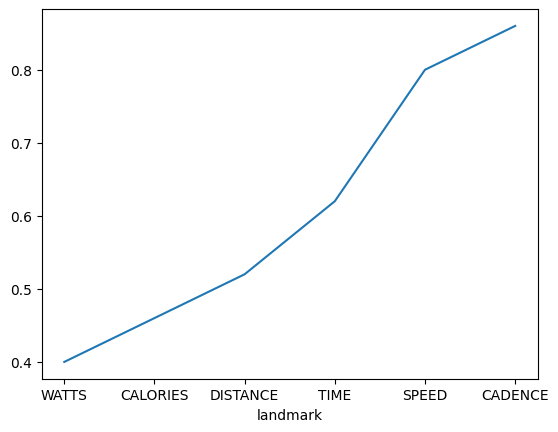

<IPython.core.display.Javascript object>

In [474]:
matches.assign(assigned=lambda f: f.inference_text.notnull()).groupby(
    "landmark"
).assigned.mean().sort_values().plot()

In [517]:
matches.head()

(matches.inference_text == matches.ssocr).mean()

,landmark,inference_text,inference_score,landmark_bbox,match_bbox,frame,ssocr
0,CADENCE,None,NaN,"[[1121.0, 440.0], [1338.0, 445.0], [1337.0, 50...",None,output_1008.png,41
1,CALORIES,None,NaN,"[[1093.0, 796.0], [1319.0, 803.0], [1317.0, 86...",None,output_1008.png,2
2,DISTANCE,0.14,0.972719,"[[216.0, 800.0], [448.0, 800.0], [448.0, 850.0...","[[294.0, 879.0], [592.0, 879.0], [592.0, 995.0...",output_1008.png,0.1_
3,SPEED,15.2,0.999608,"[[214.0, 435.0], [370.0, 435.0], [370.0, 492.0...","[[254.0, 497.0], [523.0, 503.0], [520.0, 658.0...",output_1008.png,15.2
4,TIME,EE:00,0.903045,"[[758.0, 796.0], [882.0, 796.0], [882.0, 858.0...","[[616.0, 879.0], [1008.0, 879.0], [1008.0, 999...",output_1008.png,00133


0.30666666666666664

<IPython.core.display.Javascript object>

In [528]:
def score_crop(a, cf):
    l, t, r, b = cf
    perimeter = np.concatenate(
        [
            a[t:b, l].flatten(),
            a[t:b, r].flatten(),
            a[t, l:r].flatten(),
            a[t, l:r].flatten(),
        ]
    )
    score = perimeter.mean() + perimeter.std()

    return score


def tidy_crop_frame(a, cf, w=15):
    best_score = score_crop(a, cf)
    best_crop = cf

    # print(f"{cf=}")
    for ix in range(len(cf)):
        dr = 1 if (ix >= 2) else -1
        for d in range(-w * dr, w * dr):
            cfp = cf.copy()
            cfp[ix] += d
            score = score_crop(a, cfp)
            if score < best_score:
                # print(f"{best_score=} {ix=} {d=} {cfp=}")
                best_score = score
                best_crop = cfp

    return best_crop


def ssocr_subimage(im, bbox, selection, ssocr_config):
    xy = make_polygons_2d(bbox)

    l, t, r, b = (xy[:, 0].min(), xy[:, 1].min(), xy[:, 0].max(), xy[:, 1].max())
    w = abs(l - r)
    h = abs(t - b)

    s = selection
    init_crop_frame = [
        int(round(e))
        for e in (
            l + s[0] * w,
            t + s[1] * h,
            r + s[2] * w,
            b + s[3] * h,
        )
    ]

    crop_frame = tidy_crop_frame(np.asarray(im), init_crop_frame)
    imc = im.crop(crop_frame)

    return imc, run_ssocr(np.asarray(imc), *ssocr_config)


config = {
    "SPEED": dict(
        sel=(-0.2, 1.25, 1.03, 2.7),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "WATTS": dict(
        sel=(-0.2, 1.1, 0.6, 2.5),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "CADENCE": dict(
        sel=(0, 1.25, 0.20, 2.9),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "DISTANCE": dict(
        sel=(0, 1.3, 0.75, 3.25),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "TIME": dict(
        sel=(-1.2, 1.2, 1.45, 2.75),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "CALORIES": dict(
        sel=(0, 1.2, 0.2, 2.5),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
}


landmark = "CALORIES"
for frame in sample:
    cfg = config[landmark]

    im = images[sample.index(frame)]
    base = os.path.basename(frame)
    bbox = (
        matches.query("frame == @base")
        .query("landmark == @landmark")
        .landmark_bbox.squeeze()
    )

    im, out = ssocr_subimage(im, bbox, cfg["sel"], cfg["ssocr_conf"])

    im
    out

ValueError: need at least one array to concatenate

<IPython.core.display.Javascript object>

In [426]:
bbox.squeeze()

array([[214., 435.],
       [370., 435.],
       [370., 492.],
       [214., 492.]], dtype=float32)

<IPython.core.display.Javascript object>

In [246]:
import tempfile
import cv2
import subprocess
import os


def run_ssocr(image, params, commands):
    # Define the command and parameters
    cmd = ["./ssocr-2.22.2/ssocr"]

    # Add the parameters to the command
    for key, value in params.items():
        if value is None:
            cmd.append(f"--{key}")
        else:
            cmd.append(f"--{key}={value}")

    for _cmd in commands:
        cmd.extend(_cmd.split())

    # If the input is a numpy array, write it to a temporary file
    if isinstance(image, str):
        cmd.append(image)
    else:
        # Create a temporary file
        temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
        temp_file_path = temp_file.name
        # Write the image to the temporary file
        cv2.imwrite(temp_file_path, image)
        cmd.append(temp_file_path)

    # print(f"{cmd=}")

    # Run the command and get the output
    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Delete the temporary file if it was used
    if not isinstance(image, str):
        os.remove(temp_file_path)

    # Check for errors
    if result.stderr:
        print(f"Error: {result.stderr.decode()}")

    # Return the output
    return result.stdout.decode().strip()

<IPython.core.display.Javascript object>

(229,)

<Axes: >

(array([ 60,  68,  77, 137, 154]),
 {'prominences': array([41.79703794, 23.4683931 , 36.00273859, 10.97588511, 14.98559129]),
  'left_bases': array([ 47,  67,  67,  90, 139]),
  'right_bases': array([ 67,  69, 139, 139, 202])})

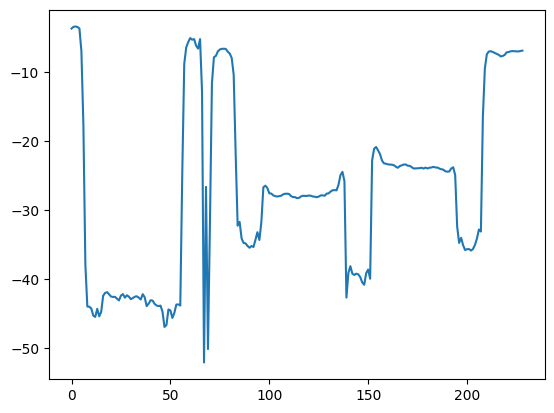

<IPython.core.display.Javascript object>

In [233]:
import scipy.signal as ss

i = 1
a.std(i).shape
pd.Series(-a.std(i)).plot()
# plt.imshow(ima[:, :, 1])
# plt.imshow(ima[:, :, 2])

ss.find_peaks(-a.std(i), prominence=10)

In [115]:
print("Building up some pixels for clustering")

import sklearn.cluster

# Build k-means model to threshold images.
pixels = np.asarray(imc)
pixels.shape
_pixels = pixels.reshape(-1, 3)

print("Building k-means model")
# Train K-means model
kmeans = sklearn.cluster.KMeans(n_clusters=4)
kmeans.fit(_pixels)



Building up some pixels for clustering


(422, 843, 3)

Building k-means model


KMeans(n_clusters=4)

<IPython.core.display.Javascript object>

In [139]:
pixels

array([[[182, 201, 159],
        [182, 201, 159],
        [182, 201, 159],
        ...,
        [ 59,  57,  53],
        [ 59,  57,  53],
        [ 59,  57,  53]],

       [[181, 200, 158],
        [181, 200, 158],
        [181, 200, 158],
        ...,
        [ 58,  56,  52],
        [ 58,  56,  52],
        [ 58,  56,  52]],

       [[181, 200, 158],
        [181, 200, 158],
        [181, 200, 158],
        ...,
        [ 58,  56,  52],
        [ 58,  56,  52],
        [ 58,  56,  52]],

       ...,

       [[ 98, 101,  80],
        [112, 119,  90],
        [119, 126,  97],
        ...,
        [ 48,  43,  40],
        [ 48,  43,  40],
        [ 48,  43,  40]],

       [[ 96,  99,  78],
        [111, 118,  89],
        [119, 126,  97],
        ...,
        [ 48,  43,  40],
        [ 48,  43,  40],
        [ 47,  42,  39]],

       [[ 93,  96,  75],
        [107, 114,  85],
        [119, 126,  97],
        ...,
        [ 50,  45,  42],
        [ 49,  44,  41],
        [ 47,  42,  39]]

<IPython.core.display.Javascript object>

(422, 843)

(422, 843)

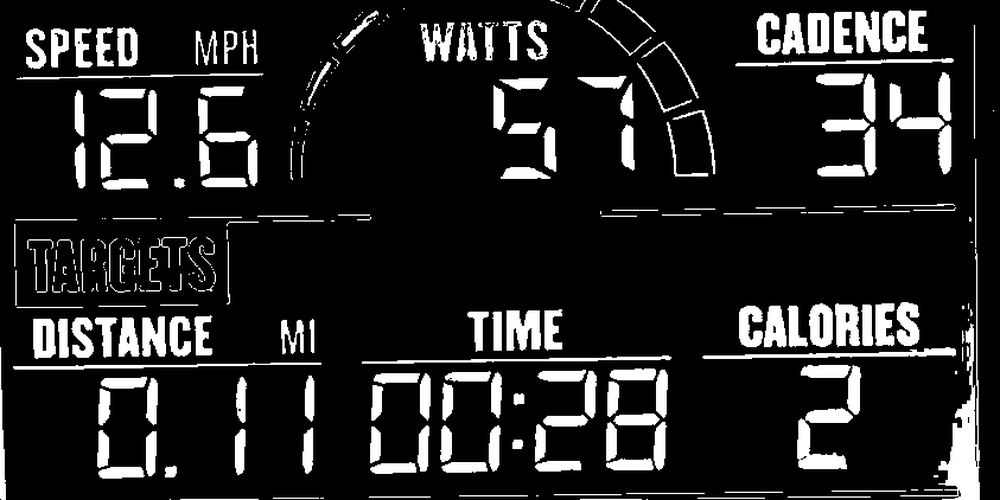

[2023/05/19 15:32:13] ppocr DEBUG: dt_boxes num : 11, elapse : 0.22794365882873535
[2023/05/19 15:32:13] ppocr DEBUG: cls num  : 11, elapse : 0.04181170463562012
[2023/05/19 15:32:14] ppocr DEBUG: rec_res num  : 11, elapse : 0.590831995010376


,bbox,inference,inference_text,inference_score
0,"[[423.0, 21.0], [548.0, 21.0], [548.0, 61.0], ...","(WAYTS, 0.7229107022285461)",WAYTS,0.722911
1,"[[755.0, 12.0], [927.0, 8.0], [928.0, 52.0], [...","(CADENCE, 0.9986267685890198)",CADENCE,0.998627
2,"[[22.0, 27.0], [139.0, 25.0], [140.0, 70.0], [...","(SPEED, 0.9982820749282837)",SPEED,0.998282
3,"[[192.0, 28.0], [260.0, 28.0], [260.0, 68.0], ...","(MPH, 0.9933496117591858)",MPH,0.993350
4,"[[816.0, 76.0], [951.0, 76.0], [951.0, 174.0],...","(34, 0.9999540448188782)",34,0.999954
5,"[[26.0, 234.0], [221.0, 234.0], [221.0, 297.0]...","(TARCETS, 0.9647909998893738)",TARCETS,0.964791
6,"[[467.0, 308.0], [565.0, 308.0], [565.0, 351.0...","(TIME, 0.9941023588180542)",TIME,0.994102
7,"[[738.0, 304.0], [918.0, 302.0], [919.0, 346.0...","(CALORIES, 0.9953020811080933)",CALORIES,0.995302
8,"[[32.0, 318.0], [211.0, 315.0], [212.0, 356.0]...","(DISTANCE, 0.9986192584037781)",DISTANCE,0.998619
9,"[[277.0, 318.0], [315.0, 316.0], [317.0, 356.0...","(MI, 0.8454282283782959)",MI,0.845428


<IPython.core.display.Javascript object>

In [163]:
imb = kmeans.predict(_pixels).reshape(422, 843) == 3
imb.shape
#plt.imshow(imb)
imbb = np.zeros_like(pixels)
# imbb
imbb[:, :, 0] = imb * 255
imbb[:, :, 1] = imb * 255
imbb[:, :, 2] = imb * 255
imbb = Image.fromarray(imbb)

imbb.height, imbb.width

resize_width = 1000
resize_height = int(
    imbb.height * (resize_width / imbb.width)
)
resized_img = imbb.resize(
    (resize_width, resize_height), Image.LANCZOS
)

resized_img


paddle_results_to_df(ocr.ocr(np.asarray(resized_img), cls=True)[0])


In [ ]:
# list(Run("BuildMonitorDatasetFlow/24").steps())

Step("BuildMonitorDatasetFlow/24/text_detect_phase2").phase_2_detection_results

In [ ]:
ocr_df.loc[:, ["speed", "watts", "cadence"]]

ocr_df.speed.unique()

In [ ]:
trdf = pd.read_csv("./top-row-states.csv")

p9.ggplot(trdf, p9.aes("cadence", "speed")) + p9.geom_line() + p9.geom_point()

p9.ggplot(trdf, p9.aes("cadence", "watts")) + p9.geom_line() + p9.geom_point()

In [ ]:
ocr_df.loc[:, ["time", "distance", "calories"]].to_csv("moo.csv")

In [ ]:
lnl = sum(
    np.log(
        1e-3
        + rapidfuzz.process.cdist(
            ocr_df[term],
            trdf[term].astype("str"),
            processor=lambda w: "".join(e for e in w if e.isdigit()),
        )
    )
    for term in ("speed", "watts", "cadence")
)
n = 11
pd.concat(
    [
        ocr_df.reset_index(drop=True),
        trdf.loc[lnl.argmax(axis=1)].reset_index(drop=True),
    ],
    axis="columns",
    ignore_index=True,
).to_csv("ocr.csv", index=False)

In [ ]:
pd.json_normalize(
    Flow("BuildMonitorDatasetFlow").latest_successful_run.data.phase1_results[
        "predictions"
    ]
).loc[:, ["rec_texts", "det_polygons"]].explode(["rec_texts", "det_polygons"]).query(
    "rec_texts in ('speed', 'cadence', 'distance', 'calories')"
)

In [ ]:
from mmocr.apis import MMOCRInferencer

ocr = MMOCRInferencer(det="DBNetpp", rec="ABINet")

ocr("/bucket/exercise-machina/frames",
    batch_size=8,
    out_dir="/bucket/exercise-machina/frames-ocr",
   save_pred=True
   )

#x = ocr("output_001.png", show=False, print_result=False, return_vis=False)


In [ ]:
import cv2
import numpy as np
from fuzzywuzzy import fuzz


def display_image(image, width_inches=12.5):
    height, width, _ = image.shape
    aspect_ratio = height / width

    fig_width = width_inches
    fig_height = width_inches * aspect_ratio

    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.imshow(image)
    plt.axis("off")
    plt.show()


def draw_ocr_results(image, ocr_data, extra_polygons=[]):
    # Convert the image to BGR format for drawing with OpenCV
    if len(image.shape) == 2 or image.shape[2] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    for ix, row in ocr_data.iterrows():
        text = row["rec_texts"]
        polygon = row["det_polygons"]
        points = np.array(polygon).reshape(-1, 2).astype(np.int32)

        # Draw the bounding box
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 255), thickness=2)

        # Calculate the center of the bounding box
        center = points.mean(axis=0).astype(np.int32)

        # Put the text annotation in the center of the bounding box
        cv2.putText(
            image, text, tuple(center), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2
        )

    for pg in extra_polygons:
        points = np.array(pg).reshape(-1, 2).astype(np.int32)

        # Draw the bounding box
        cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=3)

    return image


def find_most_similar_text(df, query, similarity_threshold=90):
    best_match = None
    best_similarity = 0

    for index, row in df.iterrows():
        similarity = fuzz.ratio(query, row["rec_texts"])
        if (similarity >= similarity_threshold) and (similarity > best_similarity):
            best_similarity = similarity
            best_match = row

    if best_match is not None:
        return np.asarray(best_match["det_polygons"]).reshape(-1, 2).astype(np.int32)

    return []


def super_bounding_box(landmarks, keys):
    min_x, min_y = float("inf"), float("inf")
    max_x, max_y = float("-inf"), float("-inf")

    for key in keys:
        if key not in landmarks:
            raise ValueError(f"Key '{key}' not found in landmarks.")

        bounding_box = landmarks[key]
        x1, y1 = bounding_box[:, 0].min(), bounding_box[:, 1].min()
        x2, y2 = bounding_box[:, 0].max(), bounding_box[:, 1].max()

        min_x, min_y = min(min_x, x1), min(min_y, y1)
        max_x, max_y = max(max_x, x2), max(max_y, y2)

    return np.array([[min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y]])


def infill_bounding_box(landmarks, key1, key2):
    if key1 not in landmarks:
        raise ValueError(f"Key '{key1}' not found in landmarks.")
    if key2 not in landmarks:
        raise ValueError(f"Key '{key2}' not found in landmarks.")

    bbox1 = landmarks[key1]
    bbox2 = landmarks[key2]

    x1_1, y1_1 = bbox1[:, 0].min(), bbox1[:, 1].min()
    x1_2, y1_2 = bbox1[:, 0].max(), bbox1[:, 1].max()

    x2_1, y2_1 = bbox2[:, 0].min(), bbox2[:, 1].min()
    x2_2, y2_2 = bbox2[:, 0].max(), bbox2[:, 1].max()

    min_x = max(x1_2, x2_1)
    max_x = min(x1_1, x2_2)
    min_y = max(y1_1, y2_1)
    max_y = min(y1_2, y2_2)

    return np.array([[min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y]])


def infill_top_bottom_bbox(landmarks, top_key, bottom_key):
    if top_key not in landmarks:
        raise ValueError(f"Key '{top_key}' not found in landmarks.")
    if bottom_key not in landmarks:
        raise ValueError(f"Key '{bottom_key}' not found in landmarks.")

    top_bbox = landmarks[top_key]
    bottom_bbox = landmarks[bottom_key]

    top_left = [top_bbox[:, 0].min(), top_bbox[:, 1].max()]
    top_right = [top_bbox[:, 0].max(), top_bbox[:, 1].max()]

    bottom_left = [bottom_bbox[:, 0].min(), bottom_bbox[:, 1].min()]
    bottom_right = [bottom_bbox[:, 0].max(), bottom_bbox[:, 1].min()]

    return np.array([top_left, top_right, bottom_right, bottom_left])


# Example usage:
# landmarks = {
#     'top_key': np.array([[10, 20], [30, 20], [30, 40], [10, 40]]),
#     'bottom_key': np.array([[15, 50], [25, 50], [25, 60], [15, 60]]),
# }
# infill_top_bottom = infill_top_bottom_bbox(landmarks, 'top_key', 'bottom_key')
# print(infill_top_bottom)


def build_ss_polygons(df):
    landmarks = [
        "rogue",
        "intervals",
        "speed",
        "mph",
        "watts",
        "cadence",
        "targets",
        "distance",
        "time",
        "calories",
        "heart",
        "rate",
        "intervals",
    ]
    landmark_map = dict((e, find_most_similar_text(df, e)) for e in landmarks)

    landmark_map["smwc"] = super_bounding_box(
        landmark_map, ["speed", "mph", "watts", "cadence"]
    )
    landmark_map["tdtc"] = super_bounding_box(
        landmark_map, ["targets", "distance", "time", "calories"]
    )
    landmark_map["hr"] = super_bounding_box(landmark_map, ["heart", "rate"])

    #     landmark_map["upper_row"] = infill_top_bottom_bbox(
    #         landmark_map, "speed+mph", "tdtc"
    #     )
    #     landmark_map["lower_row"] = infill_top_bottom_bbox(landmark_map, "tdtc", "hr")

    return landmark_map


#     return [
#         landmark_map["upper_row"],
#         landmark_map["lower_row"],
#     ]


ocr_df = pd.DataFrame(x["predictions"][0])

image = cv2.imread("output_001.png")


digit_bboxes = build_ss_polygons(ocr_df)

image_p = draw_ocr_results(image, ocr_df, [])

display_image(image_p)

In [ ]:
display_image(image)

In [ ]:
# digit_bboxes

from scipy.stats import linregress

keys = (
    ["rogue", "intervals"]
    + ["speed", "mph", "watts", "cadence"]
    + ["targets", "distance", "time", "calories"]
    + ["heart", "rate"]
)

for key in keys:
    slope, *rest = linregress(digit_bboxes[key][:, 0], digit_bboxes[key][:, 1])
    angle_rad = np.arctan(slope)
    angle_deg = np.degrees(angle_rad)

    key, slope, angle_deg

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def estimate_angle_from_horizontal(bbox):
    # Get the x and y coordinates of the bounding box corners
    x = bbox[:, 0].reshape(-1, 1)
    y = bbox[:, 1]

    # Fit a linear regression model
    lr = LinearRegression()
    lr.fit(x, y)

    # Calculate the angle from the slope using arctan
    angle_rad = np.arctan(lr.coef_[0])
    angle_deg = np.degrees(angle_rad)

    # Adjust the angle to be within -90 to 90 degrees
    if angle_deg > 45:
        angle_deg -= 90
    elif angle_deg < -45:
        angle_deg += 90

    return angle_deg

# Example usage:
# bbox = np.array([[10, 20], [30, 20], [30, 40], [10, 40]])
# angle = estimate_angle_from_horizontal(bbox)
# print(angle)


import cv2
import numpy as np

def optimal_rectangular_transform(bboxes):
    transforms = []
    
    for bbox in bboxes:
        # Estimate angles for each pair of opposite sides
        angle1 = estimate_angle_from_horizontal(bbox[[0, 1], :])
        angle2 = estimate_angle_from_horizontal(bbox[[2, 3], :])
        angle3 = estimate_angle_from_horizontal(bbox[[0, 3], :])
        angle4 = estimate_angle_from_horizontal(bbox[[1, 2], :])

        # Average the angles
        avg_horizontal_angle = (angle1 + angle2) / 2
        avg_vertical_angle = (angle3 + angle4) / 2

        # Get the center of the bounding box
        center = np.mean(bbox, axis=0)

        # Calculate the affine transformation matrix
        horizontal_rotation_matrix = cv2.getRotationMatrix2D(tuple(center), avg_horizontal_angle, 1)
        vertical_rotation_matrix = cv2.getRotationMatrix2D(tuple(center), avg_vertical_angle, 1)

        # Apply the horizontal rotation
        rotated_bbox = cv2.transform(np.float32([bbox]), horizontal_rotation_matrix)[0]

        # Compute the vertical rotation center
        rotated_center = np.mean(rotated_bbox, axis=0)

        # Calculate the vertical rotation matrix based on the rotated center
        vertical_rotation_matrix = cv2.getRotationMatrix2D(tuple(rotated_center), avg_vertical_angle, 1)

        # Store the transformation matrices
        transforms.append((horizontal_rotation_matrix, vertical_rotation_matrix))

    return transforms

# Example usage:
# bboxes = [np.array([[10, 20], [30, 20], [30, 40], [10, 40]])]
# transforms = optimal_rectangular_transform(bboxes)
# print(transforms)


# Example usage:
bboxes = [digit_bboxes["rogue"], digit_bboxes["cadence"]]
transforms = optimal_rectangular_transform(bboxes)
print(transforms)


In [ ]:
import numpy as np
import cv2

def compute_perspective_transform(bbox, target_bbox):
    src_points = np.float32(bbox)
    dst_points = np.float32(target_bbox)
    transformation_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    return transformation_matrix

bboxes = [...]  # List of k bounding boxes
target_bboxes = [...]  # List of k corresponding target rectangular bounding boxes
weights = [...]  # List of k corresponding weights

# Calculate the perspective transformations for each bounding box
transformations = [compute_perspective_transform(bbox, target_bbox)
                   for bbox, target_bbox in zip(bboxes, target_bboxes)]

# Normalize the weights
normalized_weights = np.array(weights) / np.sum(weights)

# Compute the weighted average of the transformation matrices
weighted_avg_transform = np.zeros((3, 3), dtype=np.float32)
for transform, weight in zip(transformations, normalized_weights):
    weighted_avg_transform += transform * weight


In [ ]:
import cv2
import numpy as np
from IPython.display import display, clear_output
import ipywidgets as widgets
from PIL import Image
from io import BytesIO

def display_image(img):
    _, img_encoded = cv2.imencode('.png', img)
    img_bytes = img_encoded.tobytes()
    img_pil = Image.open(BytesIO(img_bytes))
    display(img_pil)

def warp_perspective(angle, scale, tx, ty):
    clear_output(wait=True)
    
    rows, cols, _ = img.shape
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotation_matrix[:, 2] += [tx, ty]

    img_warped = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    display_image(img_warped)

# Load your input image
#img = cv2.imread('path/to/your/image.jpg')
img = image_p

# Create widgets for the transformation parameters
angle_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='Rotation Angle')
scale_slider = widgets.FloatSlider(min=0.1, max=3, step=0.1, value=1, description='Scale')
tx_slider = widgets.IntSlider(min=-100, max=100, step=1, value=0, description='Translation X')
ty_slider = widgets.IntSlider(min=-100, max=100, step=1, value=0, description='Translation Y')

widgets.interact(warp_perspective, angle=angle_slider, scale=scale_slider, tx=tx_slider, ty=ty_slider)


In [ ]:
import cv2
import numpy as np
from IPython.display import display, clear_output
import ipywidgets as widgets
from PIL import Image
from io import BytesIO

def display_image(img):
    _, img_encoded = cv2.imencode('.png', img)
    img_bytes = img_encoded.tobytes()
    img_pil = Image.open(BytesIO(img_bytes))
    display(img_pil)


def warp_perspective(pitch, yaw, roll):
    clear_output(wait=True)
    
    def rotation_matrix(axis, angle):
        return cv2.Rodrigues(np.radians(angle) * axis)[0]

    rows, cols, _ = img.shape
    center = (cols // 2, rows // 2)
    focal_length = cols / (2 * np.tan(np.radians(60) / 2))
    
    # Build the rotation matrix
    r_x = rotation_matrix(np.array([1, 0, 0]), pitch)
    r_y = rotation_matrix(np.array([0, 1, 0]), yaw)
    r_z = rotation_matrix(np.array([0, 0, 1]), roll)
    r = np.matmul(np.matmul(r_z, r_y), r_x)

    # Build the perspective transformation matrix
    m = np.zeros((3, 4), dtype=np.float64)
    m[:, :3] = r
    m[:, 3] = [0, 0, focal_length]
    m_4x4 = np.vstack((m, np.array([0, 0, 0, 1])))
    pre_m = np.array([[1, 0, 0, -center[0]], [0, 1, 0, -center[1]], [0, 0, 1, 0], [0, 0, 0, 1]])
    m = np.matmul(pre_m, m_4x4)[:3]
    
    # Apply the perspective transformation
    img_warped = cv2.warpPerspective(img, m, (cols, rows))
    display_image(img_warped)
# Load your input image
#img = cv2.imread('path/to/your/image.jpg')
img = image_p

# Create widgets for the angles
pitch_slider = widgets.FloatSlider(min=-10, max=10, step=0.5, value=0, description='Pitch')
yaw_slider = widgets.FloatSlider(min=-10, max=10, step=0.5, value=0, description='Yaw')
roll_slider = widgets.FloatSlider(min=-10, max=10, step=0.5, value=0, description='Roll')

widgets.interact(warp_perspective, pitch=pitch_slider, yaw=yaw_slider, roll=roll_slider)


In [ ]:
def square_off(bbox, f=0.5):
    x1 = bbox[[0, 1], 0].mean()
    x2 = bbox[[2, 3], 0].mean()

    y1 = bbox[[0, 2], 1].mean()
    y2 = bbox[[1, 3], 1].mean()

    out = np.array(
        [
            [x1, y1],
            [x1, y2],
            [x2, y1],
            [x2, y2],
        ]
    )

    return (1 - f) * bbox + f * out


# Define a 2D numpy array bounding box
src_bbox = digit_bboxes["watts"].astype(np.float32)
src_bbox

dst_bbox = square_off(src_bbox, 1)
# dst_bbox = src_bbox
dst_bbox

# Define the destination bounding box
# dst_bbox = np.array([[100, 100], [200, 100], [200, 200], [100, 200]], dtype=np.float32)

# Calculate the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_bbox, dst_bbox)
M

# Now you can use M to transform the original image using cv2.warpPerspective
rows, cols, _ = image_p.shape
display_image(image_p)
display_image(cv2.warpPerspective(image_p, M, (cols, rows)))

In [ ]:
df = pd.DataFrame(
    np.concatenate(
        [
            digit_bboxes[e]
            for e in [
                "speed",
                # "mph",
                # "watts",
                "cadence",
                "distance",
                # "time",
                "calories",
                # "targets",
                # "heart",
                # "rate",
            ]
        ]
    ),
    columns=["x", "y"],
)
# df
# ?linregress
slope, *rest = linregress(df.x.to_numpy(), df.y.to_numpy())

p9.ggplot(df, p9.aes("x", "-y")) + p9.geom_point() + p9.geom_smooth(method="lm")


def warp_perspective(img, angle=0, scale=1, tx=0, ty=0):
    # clear_output(wait=True)

    rows, cols, _ = img.shape
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotation_matrix[:, 2] += [tx, ty]

    return cv2.warpAffine(img, rotation_matrix, (cols, rows))


def crop_image(image, bbox):
    """
    Crop an image (in numpy representation) to the given bounding box.

    Args:
    - image (numpy.ndarray): The input image in numpy format (height, width, channels)
    - bbox (list or tuple): The bounding box as (x_min, y_min, x_max, y_max)

    Returns:
    - cropped_image (numpy.ndarray): The cropped image
    """
    x_min, y_min, x_max, y_max = bbox
    cropped_image = image[y_min:y_max, x_min:x_max]

    return cropped_image


width = df.x.max() - df.x.min()
height = df.y.max() - df.y.min()
(width, height)
bbox = np.round(
    np.asarray(
        [
            df.x.min() - 0.05 * width,
            df.y.min() - 0.05 * height,
            df.x.max() + 0.10 * width,
            df.y.max() + 0.45 * height,
        ]
    )
).astype(int)

image_p_c = crop_image(image_p, bbox)


display_image(image_p_c)

angle_rad = np.arctan(slope)
angle_deg = np.degrees(angle_rad)
(slope, angle_rad, angle_deg)

display_image(warp_perspective(image_p_c, angle=angle_deg))

In [ ]:
x.keys()

pd.DataFrame(x["predictions"][0])

plt.imshow(x["visualization"][0])

In [ ]:
1 / 0

In [ ]:
# Iterate through all the image files in the directory
for fname in image_directory.glob("*"):
    if not fname.suffix in {'.png', '.jpg', '.jpeg'}:
        continue
    
    print(f"On image file [{fname}]")

    # Run EasyOCR on the image
    results = reader.readtext(str(fname))

    print(results)



In [ ]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(rec='svtr-small')
result = infer(root / "frames/output_001.png", save_vis=True, return_vis=True)
print(result['predictions'])

In [ ]:
plt.imshow(result['visualization'][0])
plt.show()